In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
movies = pd.read_csv(r"C:\Users\SUSHIL KUMAR\Desktop\dvp_final\datasets\movieLens dataset\movies.csv")
ratings = pd.read_csv(r"C:\Users\SUSHIL KUMAR\Desktop\dvp_final\datasets\movieLens dataset\ratings.csv")


In [2]:
print("Movies dataset shape:", movies.shape)
print("Ratings dataset shape:", ratings.shape)

print("\nMovies columns:", movies.columns)
print("Ratings columns:", ratings.columns)

print("\nMovies Info:")
print(movies.info())
print("\nRatings Info:")
print(ratings.info())


Movies dataset shape: (9742, 3)
Ratings dataset shape: (100836, 4)

Movies columns: Index(['movieId', 'title', 'genres'], dtype='object')
Ratings columns: Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

Movies Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None

Ratings Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3

In [3]:
print("Missing values in Movies:\n", movies.isnull().sum())
print("Missing values in Ratings:\n", ratings.isnull().sum())


Missing values in Movies:
 movieId    0
title      0
genres     0
dtype: int64
Missing values in Ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [4]:
print("Ratings statistical summary:\n", ratings['rating'].describe())


Ratings statistical summary:
 count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64


Unique movies: 9742
Unique users: 610
Unique ratings given: 10


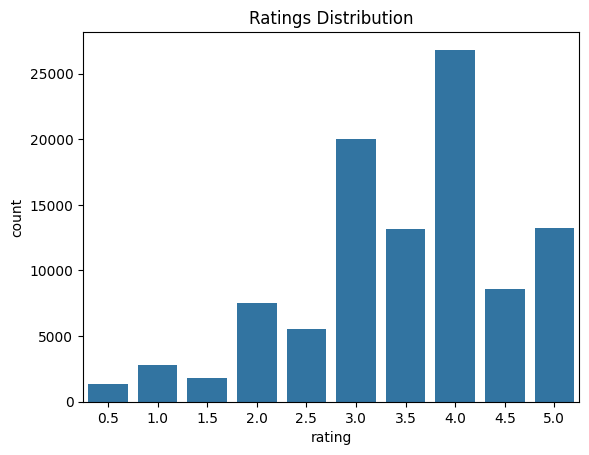

In [5]:
print("Unique movies:", movies['movieId'].nunique())
print("Unique users:", ratings['userId'].nunique())
print("Unique ratings given:", ratings['rating'].nunique())

# Ratings distribution
sns.countplot(x="rating", data=ratings)
plt.title("Ratings Distribution")
plt.show()


In [6]:
movie_ratings = ratings.groupby("movieId")['rating'].count().sort_values(ascending=False)
top_movies = movie_ratings.head(10).index
movies[movies['movieId'].isin(top_movies)]


,movieId,title,genres
97,110,Braveheart (1995),Action|Drama|War
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
277,318,"Shawshank Redemption, The (1994)",Crime|Drama
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
461,527,Schindler's List (1993),Drama|War
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller


In [7]:
avg_ratings = ratings.groupby("movieId")['rating'].mean().sort_values(ascending=False)
top_avg_movies = avg_ratings.head(10).index
movies[movies['movieId'].isin(top_avg_movies)]


,movieId,title,genres
2936,3939,Slumber Party Massacre II (1987),Horror
2937,3940,Slumber Party Massacre III (1990),Horror
2938,3941,Sorority House Massacre (1986),Horror
3807,5328,Rain (2001),Drama|Romance
4675,6983,Jane Eyre (1944),Drama|Romance
5025,7815,True Stories (1986),Comedy|Musical
7945,95843,Goodbye Charlie (1964),Comedy|Fantasy|Romance
9365,162344,Tom Segura: Mostly Stories (2016),Comedy
9367,162414,Moonlight,Drama
9711,187717,Won't You Be My Neighbor? (2018),Documentary


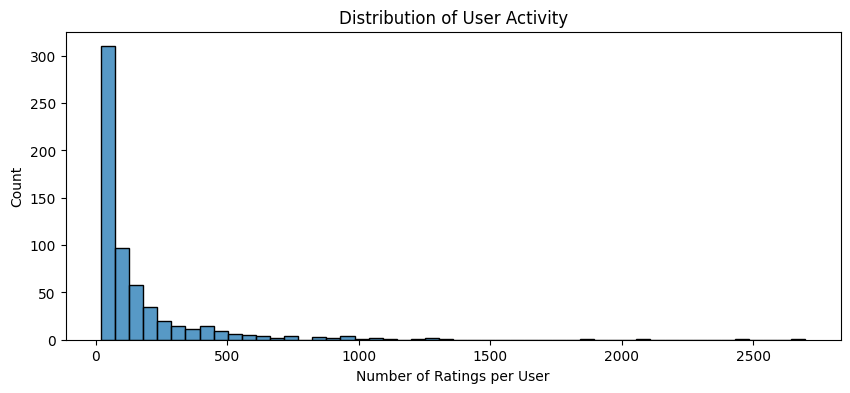

In [8]:
ratings_per_user = ratings.groupby("userId")['rating'].count()

plt.figure(figsize=(10,4))
sns.histplot(ratings_per_user, bins=50, kde=False)
plt.xlabel("Number of Ratings per User")
plt.ylabel("Count")
plt.title("Distribution of User Activity")
plt.show()


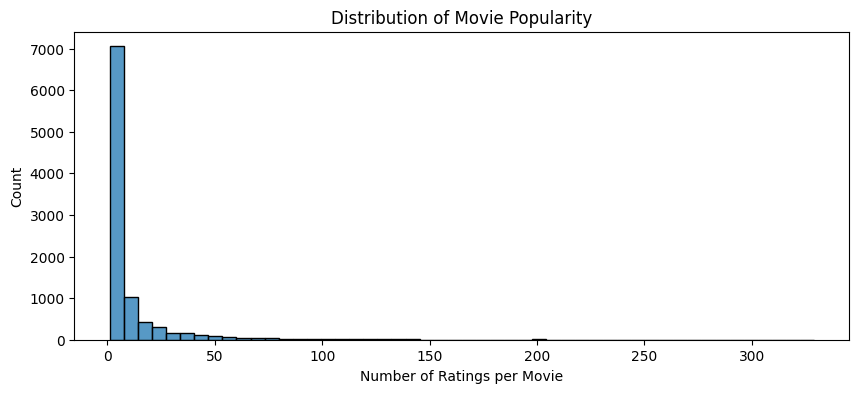

In [9]:
ratings_per_movie = ratings.groupby("movieId")['rating'].count()

plt.figure(figsize=(10,4))
sns.histplot(ratings_per_movie, bins=50, kde=False)
plt.xlabel("Number of Ratings per Movie")
plt.ylabel("Count")
plt.title("Distribution of Movie Popularity")
plt.show()


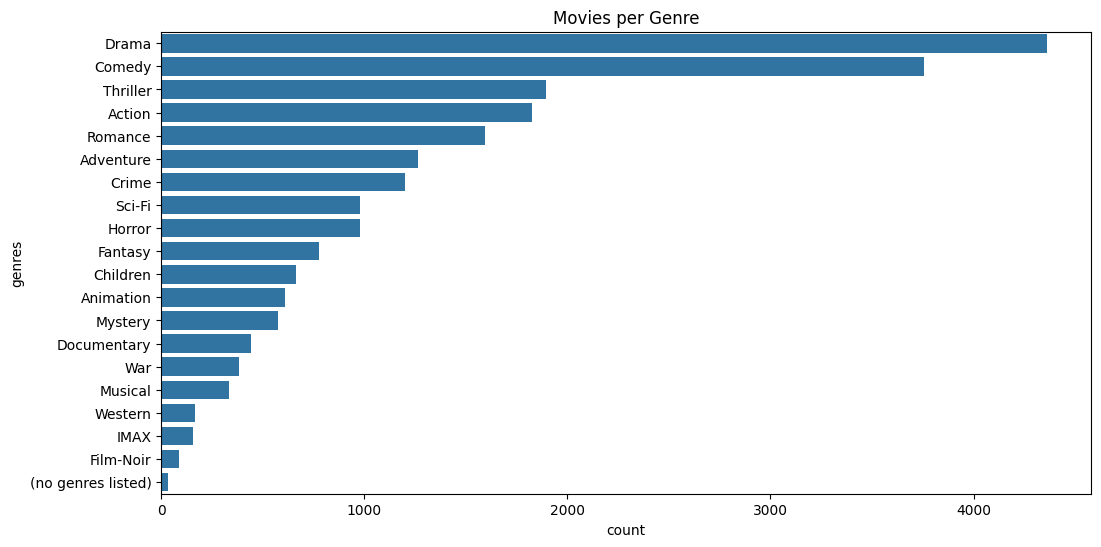

In [10]:
# Split genres and count
all_genres = movies['genres'].str.split('|').explode()
plt.figure(figsize=(12,6))
sns.countplot(y=all_genres, order=all_genres.value_counts().index)
plt.title("Movies per Genre")
plt.show()


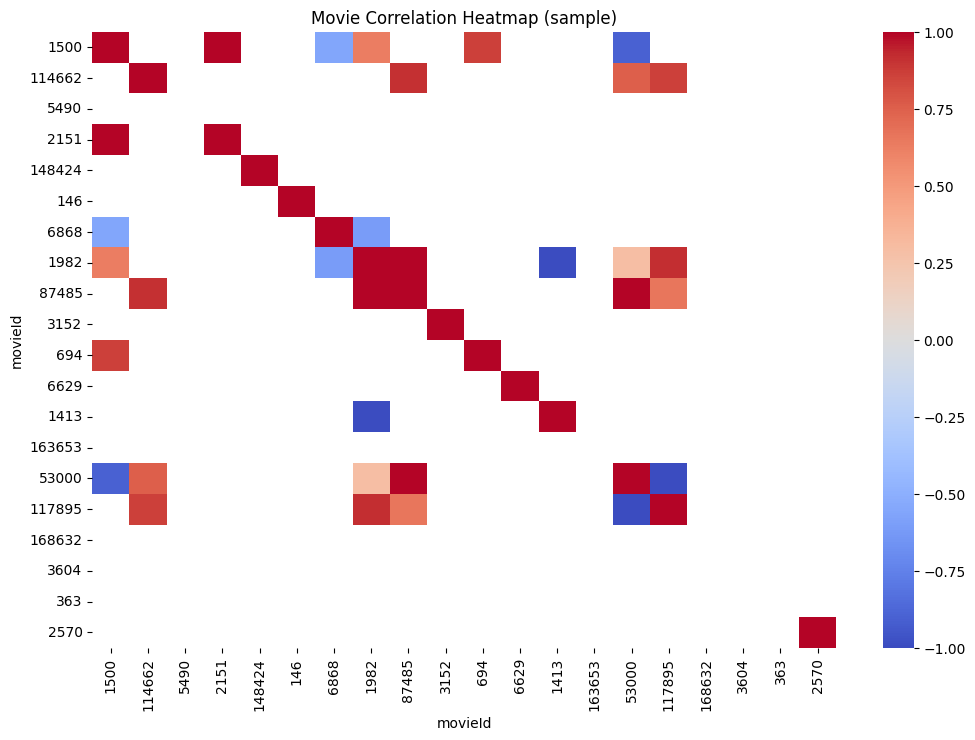

In [11]:
# Pivot for movie-user matrix
pivot = ratings.pivot(index="movieId", columns="userId", values="rating")

# Correlation heatmap (small subset for visibility)
sampled = pivot.sample(20, random_state=42).T
corr_matrix = sampled.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.title("Movie Correlation Heatmap (sample)")
plt.show()


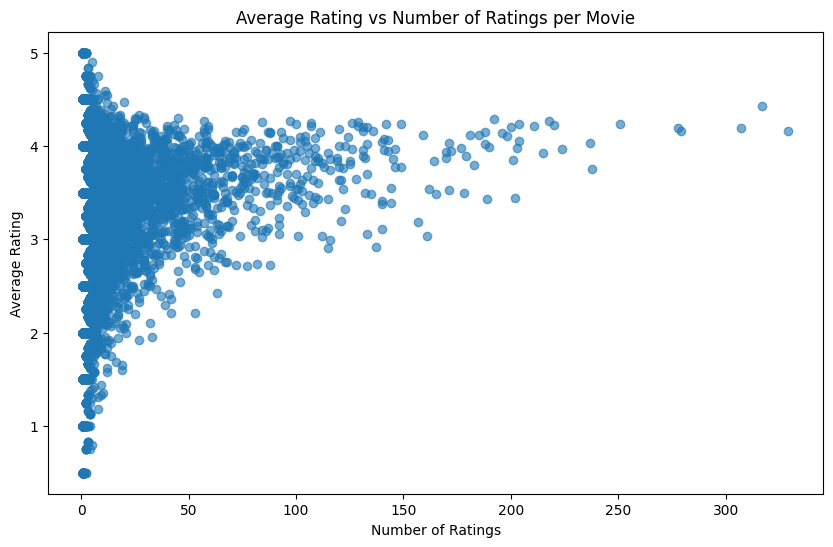

In [3]:
avg_ratings = ratings.groupby("movieId")['rating'].mean()
num_ratings = ratings.groupby("movieId")['rating'].count()

plt.figure(figsize=(10,6))
plt.scatter(num_ratings, avg_ratings, alpha=0.6)
plt.xlabel("Number of Ratings")
plt.ylabel("Average Rating")
plt.title("Average Rating vs Number of Ratings per Movie")
plt.show()


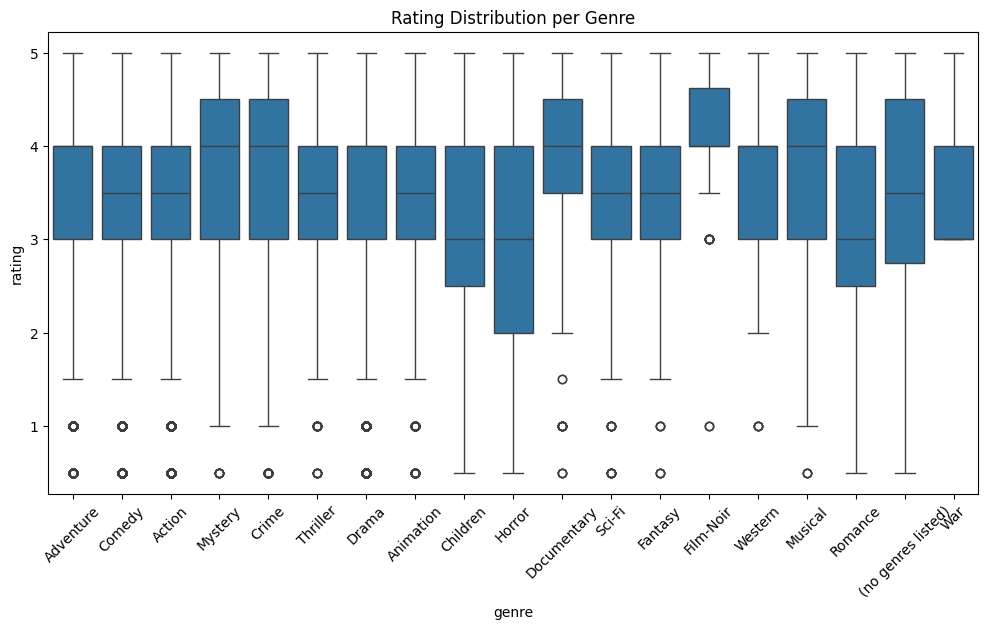

In [4]:
movies_ratings = ratings.merge(movies, on="movieId")
movies_ratings['genre'] = movies_ratings['genres'].str.split('|').str[0]  # use first genre

plt.figure(figsize=(12,6))
sns.boxplot(x='genre', y='rating', data=movies_ratings)
plt.xticks(rotation=45)
plt.title("Rating Distribution per Genre")
plt.show()


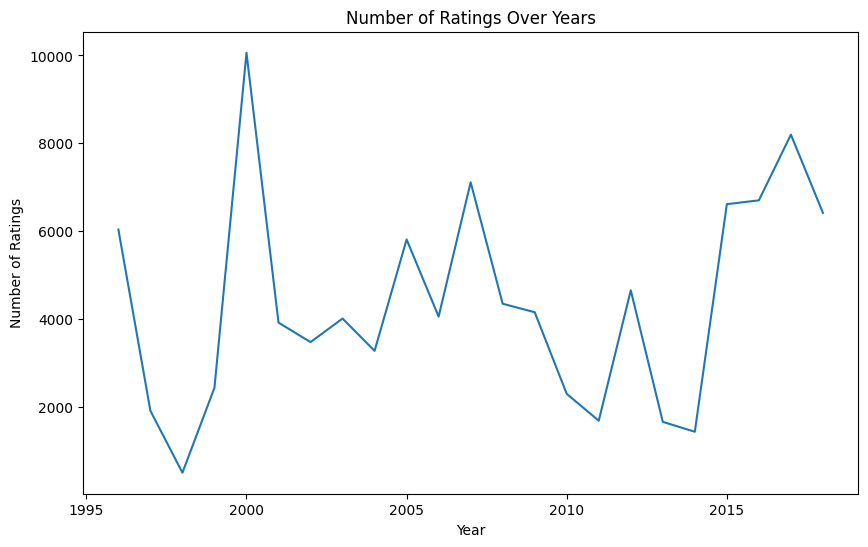

In [5]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings_over_time = ratings.groupby(ratings['timestamp'].dt.year)['rating'].count()

plt.figure(figsize=(10,6))
ratings_over_time.plot()
plt.xlabel("Year")
plt.ylabel("Number of Ratings")
plt.title("Number of Ratings Over Years")
plt.show()
